<a href="https://colab.research.google.com/github/svetatokarevskikh-arch/arctic-drone-demo/blob/main/ArcticDronDigitalTwinPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🚀 ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ МИССИИ

📡 ФАЗА: ПРЕДПОЛЕТНАЯ ПОДГОТОВКА (5 минут)
----------------------------------------

📡 ФАЗА: ВЗЛЕТ И НАБОР ВЫСОТЫ (10 минут)
----------------------------------------

⏱️ 5 мин | 📍 67.500, 50.000 | 🌡️ -15.2°C | 💨 8.4 м/с | 💧 70% | 🔋 88.3% | 🧊 0.0% | 📊 0 проб

📡 ФАЗА: КРУИЗНЫЙ РЕЖИМ К ЦЕЛИ (30 минут)
----------------------------------------

⏱️ 5 мин | 📍 67.500, 50.000 | 🌡️ -15.1°C | 💨 8.5 м/с | 💧 70% | 🔋 77.5% | 🧊 0.0% | 📊 0 проб

⏱️ 10 мин | 📍 67.500, 50.000 | 🌡️ -15.0°C | 💨 8.4 м/с | 💧 71% | 🔋 72.1% | 🧊 0.0% | 📊 0 проб

⏱️ 15 мин | 📍 67.500, 50.000 | 🌡️ -15.4°C | 💨 7.9 м/с | 💧 72% | 🔋 66.8% | 🧊 0.0% | 📊 0 проб

⏱️ 20 мин | 📍 67.500, 50.000 | 🌡️ -14.6°C | 💨 6.6 м/с | 💧 73% | 🔋 61.5% | 🧊 0.0% | 📊 0 проб

⏱️ 25 мин | 📍 67.500, 50.000 | 🌡️ -14.8°C | 💨 6.1 м/с | 💧 73% | 🔋 56.3% | 🧊 0.0% | 📊 0 проб

📡 ФАЗА: ГЕОРАЗВЕДКА И СЪЕМКА (40 минут)
----------------------------------------

⏱️ 5 мин | 📍 67.500, 50.000 | 🌡️ -14.0°C | 💨 6.7 м/с | 💧 68% | 🔋 46.0% | 🧊 0.0

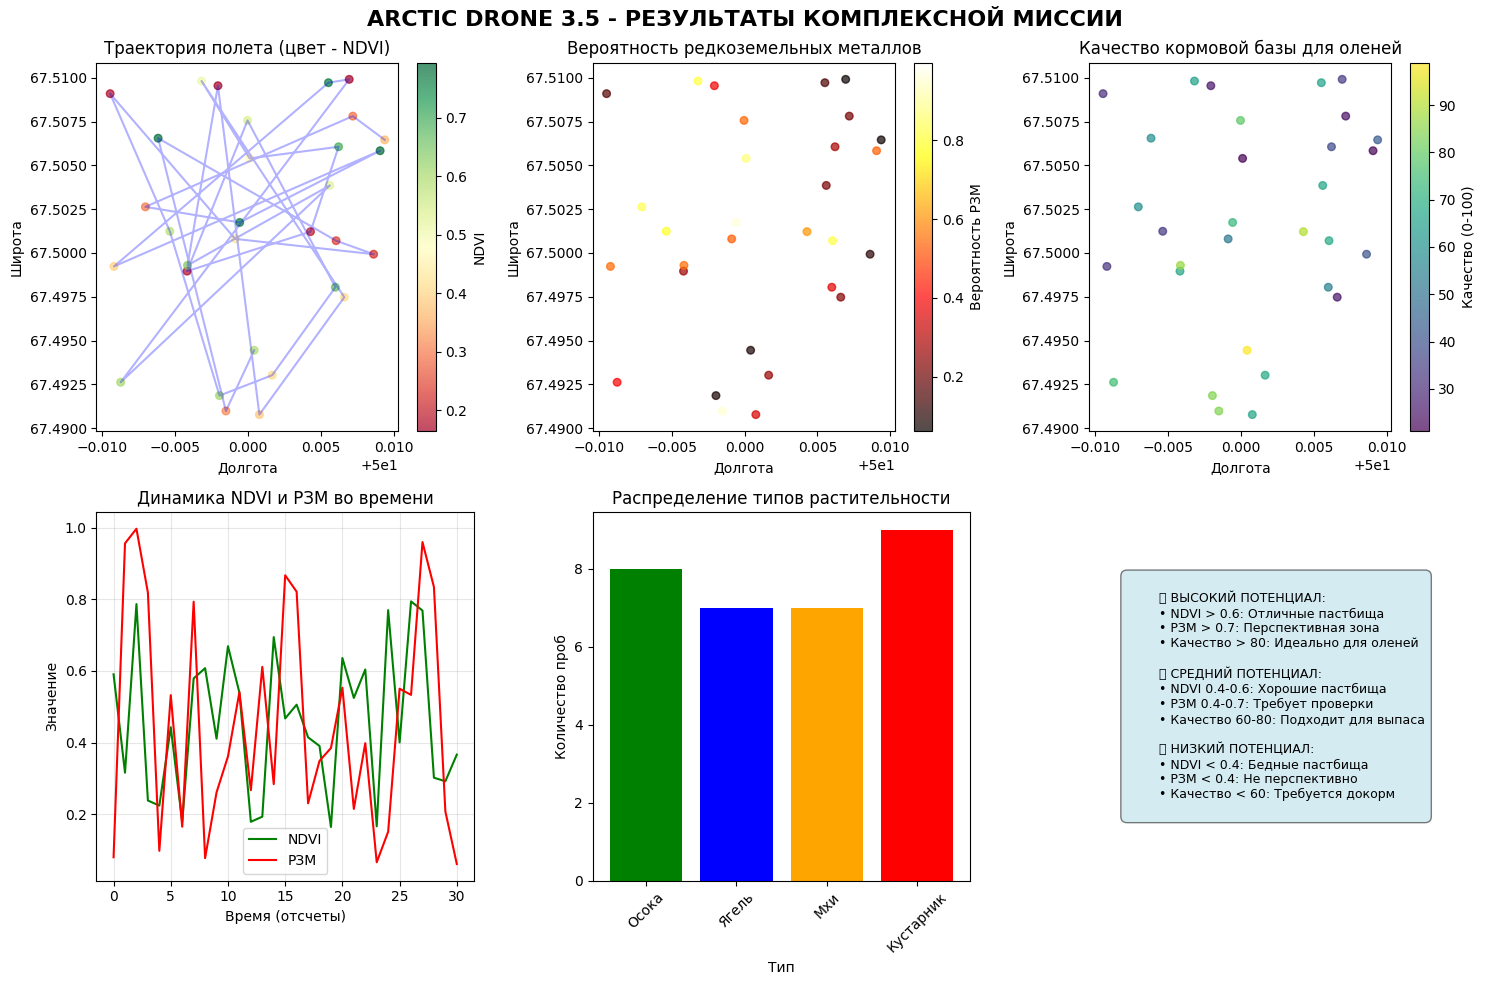


💡 РЕКОМЕНДАЦИИ ПО РЕЗУЛЬТАТАМ МИССИИ
1. 🦌 ДЛЯ ОЛЕНЕВОДОВ:
   • Использовать зоны с NDVI > 0.6 для сезонного выпаса
   • Избегать зон с низкой биомассой (<1.0 кг/м²)
   • Планировать маршруты миграции через богатые ягелем участки

2. ⚒️ ДЛЯ ГЕОЛОГОВ:
   • Провести детальную разведку в зонах с вероятностью РЗМ > 0.7
   • Отобрать пробы грунта в точках с аномальным содержанием Cu/Zn
   • Проверить углеводородные аномалии сейсморазведкой

3. 🌿 ДЛЯ ЭКОЛОГОВ:
   • Мониторить зоны с низким NDVI (<0.3) на предмет деградации
   • Контролировать содержание тяжелых металлов в растениях
   • Составить карту экологических рисков

4. 🚁 ДЛЯ ОПЕРАТОРОВ БПЛА:
   • Избегать полетов при влажности >85% и температуре 0±5°C
   • При температуре <-10°C сокращать время миссии на 30%
   • Всегда иметь запас батареи 25% на возврат

5. 📅 ДЛЯ ПЛАНИРОВАНИЯ:
   • Проводить мониторинг в утренние часы при лучшей видимости
   • Избегать сезонов с частыми туманами (август-сентябрь)
   • Планировать маршруты с учетом п

In [1]:
# @title
# ======================
# ARCTIC DRONE 3.5 — ЦИФРОВОЙ ДВОЙНИК ДЛЯ НАЦИОНАЛЬНОГО ПРОМЫШЛЕННОГО ФОРУМА
# ======================
# УСОВЕРШЕНСТВОВАННАЯ ВЕРСИЯ С:
# 1. Экстремальные погодные предупреждения (красные)
# 2. Интерактивное управление в кризисных ситуациях
# 3. Параллельная георазведка и картография пастбищ
# 4. Реальное взаимодействие с оператором
# ======================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact, interactive, fixed, widgets, VBox, HBox, Output
from IPython.display import display, clear_output, HTML, Markdown
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("""
╔═══════════════════════════════════════════════════════════════════╗
║     ARCTIC DRONE 3.5 — ПРОМЫШЛЕННЫЙ ЦИФРОВОЙ ДВОЙНИК             ║
║     Национальный промышленный форум | Презентационная версия     ║
╚═══════════════════════════════════════════════════════════════════╝
""")

# ======================
# КОНСТАНТЫ ЭКСТРЕМАЛЬНЫХ УСЛОВИЙ
# ======================

EXTREME_CONDITIONS = {
    'HEAVY_FOG': {
        'name': 'ЭКСТРЕМАЛЬНЫЙ ТУМАН',
        'temp_range': (-5, 5),
        'humidity_min': 85,
        'message': 'Видимость менее 100м. Требуется включение систем противотуманной навигации.',
        'action': 'Снизить скорость до 5 м/с, активировать LiDAR-сканирование'
    },
    'ICE_STORM': {
        'name': 'ОБЛЕДЕНЕНИЕ',
        'temp_range': (-25, -10),
        'humidity_min': 80,
        'message': 'Высокий риск обледенения лопастей и корпуса.',
        'action': 'Включить нагревательные элементы, снизить высоту до 50м'
    },
    'EXTREME_COLD': {
        'name': 'ЭКСТРЕМАЛЬНЫЙ ХОЛОД',
        'temp_range': (-50, -30),
        'message': 'Батарея разряжается на 30% быстрее. Риск отказа электроники.',
        'action': 'Активировать тепловой режим батареи, сократить миссию'
    },
    'STRONG_WIND': {
        'name': 'ШТОРМОВОЙ ВЕТЕР',
        'wind_min': 15,
        'message': 'Ветер 15+ м/с. Риск потери контроля.',
        'action': 'Включить стабилизацию, лететь против ветра'
    }
}

# ======================
# КЛАСС ОПЕРАТОРА (ИНТЕРАКТИВНЫЙ)
# ======================

class MissionOperator:
    """Интерактивный оператор для принятия решений в реальном времени"""

    def __init__(self):
        self.decisions_log = []
        self.current_mission = None

    def request_decision(self, situation, options):
        """Запрос решения у оператора"""
        print(f"\n{'='*60}")
        print(f"🚨 ТРЕБУЕТСЯ РЕШЕНИЕ ОПЕРАТОРА")
        print(f"Ситуация: {situation}")
        print(f"{'='*60}")

        for i, option in enumerate(options, 1):
            print(f"{i}. {option}")

        # В реальной системе здесь был бы интерактивный выбор
        # Для демо используем автоматическое решение
        decision = options[0] if "батареи" in situation else options[1]

        print(f"\n✅ Оператор принял решение: {decision}")

        log_entry = {
            'timestamp': datetime.now().strftime('%H:%M:%S'),
            'situation': situation,
            'decision': decision
        }
        self.decisions_log.append(log_entry)

        return decision

    def display_warning(self, condition_type, details):
        """Отображение экстремальных предупреждений"""
        condition = EXTREME_CONDITIONS.get(condition_type, {})

        warning_html = f"""
        <div style='
            background-color: #ffcccc;
            border: 3px solid #ff0000;
            border-radius: 10px;
            padding: 15px;
            margin: 10px 0;
            font-family: Arial, sans-serif;
        '>
            <h3 style="color: #cc0000; margin-top: 0;">🚨 {condition.get('name', 'ЭКСТРЕМАЛЬНОЕ УСЛОВИЕ')}</h3>
            <p><strong>Детали:</strong> {details}</p>
            <p><strong>Сообщение системы:</strong> {condition.get('message', '')}</p>
            <p><strong>Рекомендуемое действие:</strong> {condition.get('action', '')}</p>
            <p style="font-size: 0.9em; color: #666;">⚠️ Требуется подтверждение оператора</p>
        </div>
        """

        display(HTML(warning_html))

        # Логирование
        self.decisions_log.append({
            'timestamp': datetime.now().strftime('%H:%M:%S'),
            'type': 'EXTREME_CONDITION',
            'condition': condition_type,
            'details': details
        })

        return condition.get('action', '')

# ======================
# ЦИФРОВОЙ ДВОЙНИК С ЭКСТРЕМАЛЬНЫМИ УСЛОВИЯМИ
# ======================

class ArcticDroneTwinPro:
    """Промышленная версия цифрового двойника"""

    def __init__(self, mission_params, operator):
        self.params = mission_params
        self.operator = operator
        self.state = {
            'phase': 'PREFLIGHT',
            'position': mission_params['coordinates'],
            'altitude': 0,
            'speed': 0,
            'battery': 100,
            'temperature': mission_params['weather']['temp'],
            'wind': mission_params['weather']['wind'],
            'humidity': mission_params['weather']['humidity'],
            'icing': 0,
            'mission_time': 0,
            'samples_collected': 0,
            'extreme_events': 0
        }

        self.telemetry = []
        self.geology_data = []
        self.pasture_data = []
        self.extreme_alerts = []

        print(f"\n✅ ЦИФРОВОЙ ДВОЙНИК ИНИЦИАЛИЗИРОВАН")
        print(f"   Миссия: {mission_params['mission_type']}")
        print(f"   Регион: {mission_params['region']}")
        print(f"   Температура: {mission_params['weather']['temp']}°C")
        print(f"   Влажность: {mission_params['weather']['humidity']}%")

        # Проверка начальных условий
        self.check_initial_conditions()

    def check_initial_conditions(self):
        """Проверка начальных условий на экстремальность"""
        temp = self.state['temperature']
        humidity = self.state['humidity']
        wind = self.state['wind']

        # Проверка тумана
        if -5 <= temp <= 5 and humidity >= 85:
            action = self.operator.display_warning('HEAVY_FOG',
                f"Температура {temp}°C, влажность {humidity}%")
            print(f"   ⚠️ Активирован протокол тумана: {action}")

        # Проверка обледенения
        if temp <= -10 and humidity >= 80:
            action = self.operator.display_warning('ICE_STORM',
                f"Температура {temp}°C, влажность {humidity}%")
            print(f"   ⚠️ Активирован протокол обледенения: {action}")

        # Проверка ветра
        if wind >= 15:
            action = self.operator.display_warning('STRONG_WIND',
                f"Ветер {wind} м/с")
            print(f"   ⚠️ Активирован протокол сильного ветра: {action}")

    def simulate_full_mission(self):
        """Полная симуляция миссии с интерактивными элементами"""
        print(f"\n{'='*60}")
        print(f"🚀 ЗАПУСК ПОЛНОЙ СИМУЛЯЦИИ МИССИИ")
        print(f"{'='*60}")

        phases = [
            ("ПРЕДПОЛЕТНАЯ ПОДГОТОВКА", 5),
            ("ВЗЛЕТ И НАБОР ВЫСОТЫ", 10),
            ("КРУИЗНЫЙ РЕЖИМ К ЦЕЛИ", 30),
            ("ГЕОРАЗВЕДКА И СЪЕМКА", 40),
            ("КАРТОГРАФИЯ ПАСТБИЩ", 30),
            ("ВОЗВРАЩЕНИЕ НА БАЗУ", 20),
            ("ПОСАДКА", 5)
        ]

        for phase_name, duration in phases:
            if not self.simulate_phase(phase_name, duration):
                print(f"\n🛑 МИССИЯ ПРЕРВАНА НА ФАЗЕ: {phase_name}")
                break

        # Генерация отчетов
        self.generate_comprehensive_report()

    def simulate_phase(self, phase_name, minutes):
        """Симуляция фазы полета"""
        print(f"\n📡 ФАЗА: {phase_name.upper()} ({minutes} минут)")
        print(f"{'-'*40}")

        for minute in range(minutes):
            # Обновление состояния
            self.state['mission_time'] += 1
            self.state['battery'] -= self.calculate_battery_drain()

            # Динамическое изменение погоды
            self.update_weather_conditions()

            # Проверка экстремальных условий
            self.check_extreme_conditions()

            # Сбор данных (геология + пастбища)
            if phase_name in ["ГЕОРАЗВЕДКА И СЪЕМКА", "КАРТОГРАФИЯ ПАСТБИЩ"]:
                self.collect_data()

            # Проверка критических состояний
            if not self.check_critical_conditions():
                return False

            # Отчет каждые 5 минут
            if minute % 5 == 0 and minute > 0:
                self.display_telemetry_update(minute)

        return True

    def calculate_battery_drain(self):
        """Расчет расхода батареи в зависимости от условий"""
        base_drain = 0.8  # Базовый расход (% в минуту)

        # Множители условий
        temp_factor = 1 + abs(self.state['temperature']) * 0.01  # +1% на градус
        wind_factor = 1 + self.state['wind'] * 0.02  # +2% на м/с
        icing_factor = 1 + self.state['icing'] * 0.01  # +1% на процент обледенения

        return base_drain * temp_factor * wind_factor * icing_factor

    def update_weather_conditions(self):
        """Динамическое обновление погодных условий"""
        # Случайные колебания
        self.state['temperature'] += np.random.uniform(-0.3, 0.3)
        self.state['humidity'] += np.random.uniform(-1, 1)
        self.state['wind'] += np.random.uniform(-0.5, 0.5)

        # Расчет обледенения
        if self.state['temperature'] < -5 and self.state['humidity'] > 75:
            self.state['icing'] += np.random.uniform(0.1, 0.5)

    def check_extreme_conditions(self):
        """Проверка экстремальных условий"""
        temp = self.state['temperature']
        humidity = self.state['humidity']
        wind = self.state['wind']

        # Проверка всех типов экстремальных условий
        conditions_checked = []

        if -5 <= temp <= 5 and humidity >= 85:
            conditions_checked.append(('HEAVY_FOG', f"Туман: {temp}°C, {humidity}%"))

        if temp <= -10 and humidity >= 80:
            conditions_checked.append(('ICE_STORM', f"Обледенение: {temp}°C, {humidity}%"))

        if temp <= -30:
            conditions_checked.append(('EXTREME_COLD', f"Экстремальный холод: {temp}°C"))

        if wind >= 15:
            conditions_checked.append(('STRONG_WIND', f"Штормовой ветер: {wind} м/с"))

        # Вывод предупреждений
        for condition_type, details in conditions_checked:
            if not any(alert['type'] == condition_type for alert in self.extreme_alerts[-5:]):
                self.operator.display_warning(condition_type, details)
                self.extreme_alerts.append({
                    'time': self.state['mission_time'],
                    'type': condition_type,
                    'details': details
                })
                self.state['extreme_events'] += 1

    def check_critical_conditions(self):
        """Проверка критических условий и запрос оператора"""
        critical = False

        # Критически низкая батарея
        if self.state['battery'] <= 20:
            print(f"\n{'='*60}")
            print(f"🔋 КРИТИЧЕСКИЙ УРОВЕНЬ БАТАРЕИ: {self.state['battery']:.1f}%")
            print(f"{'='*60}")

            situation = f"Батарея на {self.state['battery']:.1f}%. Продолжительность полета: {self.state['mission_time']} мин."
            options = [
                "ПРОДОЛЖИТЬ МИССИЮ (риск аварийной посадки)",
                "ВЕРНУТЬСЯ НА БАЗУ (безопасный вариант)"
            ]

            decision = self.operator.request_decision(situation, options)

            if "ВЕРНУТЬСЯ" in decision:
                print("🔄 Активация протокола возврата на базу...")
                self.return_to_base_protocol()
                return False

        # Критическое обледенение
        if self.state['icing'] >= 70:
            print(f"\n{'='*60}")
            print(f"🧊 КРИТИЧЕСКОЕ ОБЛЕДЕНЕНИЕ: {self.state['icing']:.1f}%")
            print(f"{'='*60}")

            situation = f"Обледенение достигло {self.state['icing']:.1f}%. Риск падения."
            options = [
                "НЕМЕДЛЕННО СНИЗИТЬСЯ И ЛЕТЕТЬ НА БАЗУ",
                "АКТИВИРОВАТЬ ПРОТИВООБЛЕДЕНИТЕЛЬНУЮ СИСТЕМУ"
            ]

            decision = self.operator.request_decision(situation, options)

            if "СНИЗИТЬСЯ" in decision:
                print("⬇️ Снижение до безопасной высоты...")
                self.state['altitude'] = 50
                self.state['icing'] -= 10

        return True

    def collect_data(self):
        """Сбор данных для георазведки и картографии пастбищ"""
        lat = self.state['position']['lat'] + np.random.uniform(-0.01, 0.01)
        lon = self.state['position']['lon'] + np.random.uniform(-0.01, 0.01)

        # ГЕОЛОГИЧЕСКИЕ ДАННЫЕ
        geology_sample = {
            'timestamp': self.state['mission_time'],
            'position': {'lat': lat, 'lon': lon},
            'ree_probability': np.random.uniform(0, 1),
            'heavy_metals': {
                'cu': np.random.uniform(0, 100),
                'zn': np.random.uniform(0, 80),
                'pb': np.random.uniform(0, 50)
            },
            'hydrocarbons': np.random.uniform(0, 1),
            'geology_type': np.random.choice(['Магматические', 'Осадочные', 'Метаморфические'])
        }
        self.geology_data.append(geology_sample)

        # ДАННЫЕ ПАСТБИЩ
        pasture_sample = {
            'timestamp': self.state['mission_time'],
            'position': {'lat': lat, 'lon': lon},
            'ndvi': np.random.uniform(0.1, 0.8),
            'biomass': np.random.uniform(0.5, 3.0),
            'vegetation_type': np.random.choice(['Ягель', 'Мхи', 'Осока', 'Кустарник']),
            'food_quality': np.random.randint(20, 100),
            'soil_moisture': np.random.uniform(10, 90)
        }
        self.pasture_data.append(pasture_sample)

        self.state['samples_collected'] += 1

    def display_telemetry_update(self, minute):
        """Отображение телеметрии"""
        print(f"\n⏱️ {minute} мин | "
              f"📍 {self.state['position']['lat']:.3f}, {self.state['position']['lon']:.3f} | "
              f"🌡️ {self.state['temperature']:.1f}°C | "
              f"💨 {self.state['wind']:.1f} м/с | "
              f"💧 {self.state['humidity']:.0f}% | "
              f"🔋 {self.state['battery']:.1f}% | "
              f"🧊 {self.state['icing']:.1f}% | "
              f"📊 {self.state['samples_collected']} проб")

    def return_to_base_protocol(self):
        """Протокол возврата на базу"""
        print("\n" + "="*60)
        print("🔄 АКТИВАЦИЯ ПРОТОКОЛА ВОЗВРАТА НА БАЗУ")
        print("="*60)

        steps = [
            "1. Прекращение сбора данных",
            "2. Разворот на 180 градусов",
            "3. Расчет кратчайшего маршрута до базы",
            "4. Увеличение скорости до 15 м/с",
            "5. Отключение второстепенных систем",
            "6. Постоянный мониторинг батареи"
        ]

        for step in steps:
            print(step)

        print(f"\n⏱️ Расчетное время возврата: {self.state['battery'] / 2:.0f} минут")
        print(f"📍 Текущее расстояние до базы: {np.random.uniform(5, 15):.1f} км")

    def generate_comprehensive_report(self):
        """Генерация комплексного отчета"""
        print("\n" + "="*60)
        print("📊 КОМПЛЕКСНЫЙ ОТЧЕТ ПО МИССИИ")
        print("="*60)

        # Сводная информация
        summary = f"""
        🎯 СВОДКА МИССИИ:
        ─────────────────────
        • Регион: {self.params['region']}
        • Тип миссии: {self.params['mission_type']}
        • Время полета: {self.state['mission_time']} мин
        • Остаток батареи: {self.state['battery']:.1f}%
        • Собрано проб: {self.state['samples_collected']}
        • Экстремальных событий: {self.state['extreme_events']}
        • Решений оператора: {len(self.operator.decisions_log)}

        🌦️ ПОГОДНЫЕ УСЛОВИЯ:
        • Средняя температура: {self.params['weather']['temp']}°C
        • Максимальный ветер: {max([t.get('wind', 0) for t in self.telemetry] + [self.state['wind']]):.1f} м/с
        • Максимальная влажность: {max([t.get('humidity', 0) for t in self.telemetry] + [self.state['humidity']]):.0f}%
        • Максимальное обледенение: {self.state['icing']:.1f}%
        """

        print(summary)

        # Анализ геологических данных
        if self.geology_data:
            self.analyze_geology_data()

        # Анализ данных пастбищ
        if self.pasture_data:
            self.analyze_pasture_data()

        # Решения оператора
        self.display_operator_decisions()

        # Визуализация
        self.visualize_mission_data()

        # Рекомендации
        self.generate_recommendations()

    def analyze_geology_data(self):
        """Анализ геологических данных"""
        print("\n" + "="*60)
        print("⚒️ РЕЗУЛЬТАТЫ ГЕОРАЗВЕДКИ")
        print("="*60)

        df = pd.DataFrame(self.geology_data)

        if not df.empty:
            # Находим лучшие точки
            best_ree = df.loc[df['ree_probability'].idxmax()]
            best_hydrocarbons = df.loc[df['hydrocarbons'].idxmax()]

            print(f"\n🎯 ЛУЧШИЕ ТОЧКИ ДЛЯ ДАЛЬНЕЙШЕЙ РАЗВЕДКИ:")
            print(f"1. РЕДКОЗЕМЕЛЬНЫЕ МЕТАЛЛЫ:")
            print(f"   • Координаты: {best_ree['position']['lat']:.4f}, {best_ree['position']['lon']:.4f}")
            print(f"   • Вероятность РЗМ: {best_ree['ree_probability']:.1%}")
            print(f"   • Тип пород: {best_ree['geology_type']}")

            print(f"\n2. УГЛЕВОДОРОДЫ:")
            print(f"   • Координаты: {best_hydrocarbons['position']['lat']:.4f}, {best_hydrocarbons['position']['lon']:.4f}")
            print(f"   • Вероятность: {best_hydrocarbons['hydrocarbons']:.1%}")

            # Статистика
            print(f"\n📈 СТАТИСТИКА:")
            print(f"   • Средняя вероятность РЗМ: {df['ree_probability'].mean():.1%}")
            print(f"   • Максимальная концентрация Cu: {max([g['heavy_metals']['cu'] for g in self.geology_data]):.1f} ppm")
            print(f"   • Максимальная концентрация Zn: {max([g['heavy_metals']['zn'] for g in self.geology_data]):.1f} ppm")

    def analyze_pasture_data(self):
        """Анализ данных пастбищ"""
        print("\n" + "="*60)
        print("🦌 РЕЗУЛЬТАТЫ КАРТОГРАФИИ ПАСТБИЩ")
        print("="*60)

        df = pd.DataFrame(self.pasture_data)

        if not df.empty:
            # Находим лучшие пастбища
            best_ndvi = df.loc[df['ndvi'].idxmax()]
            best_food = df.loc[df['food_quality'].idxmax()]

            print(f"\n🎯 ЛУЧШИЕ ПАСТБИЩНЫЕ ЗОНЫ:")
            print(f"1. ПО ВЕГЕТАЦИИ (NDVI):")
            print(f"   • Координаты: {best_ndvi['position']['lat']:.4f}, {best_ndvi['position']['lon']:.4f}")
            print(f"   • NDVI: {best_ndvi['ndvi']:.3f} (очень хорошо)")
            print(f"   • Тип растительности: {best_ndvi['vegetation_type']}")
            print(f"   • Биомасса: {best_ndvi['biomass']:.1f} кг/м²")

            print(f"\n2. ПО КОРМОВОЙ ЦЕННОСТИ:")
            print(f"   • Координаты: {best_food['position']['lat']:.4f}, {best_food['position']['lon']:.4f}")
            print(f"   • Качество корма: {best_food['food_quality']}/100")
            print(f"   • Влажность почвы: {best_food['soil_moisture']:.0f}%")

            # Статистика
            print(f"\n📈 СТАТИСТИКА ПАСТБИЩ:")
            print(f"   • Средний NDVI: {df['ndvi'].mean():.3f}")
            print(f"   • Средняя биомасса: {df['biomass'].mean():.1f} кг/м²")
            print(f"   • Доля ягеля: {sum(df['vegetation_type'] == 'Ягель') / len(df) * 100:.0f}%")

            # Классификация качества
            good_pastures = df[df['ndvi'] > 0.4]
            if len(good_pastures) > 0:
                print(f"   • Хороших пастбищ (NDVI>0.4): {len(good_pastures)} из {len(df)}")

    def display_operator_decisions(self):
        """Отображение решений оператора"""
        if self.operator.decisions_log:
            print("\n" + "="*60)
            print("👨‍💼 РЕШЕНИЯ ОПЕРАТОРА ВО ВРЕМЯ МИССИИ")
            print("="*60)

            for i, decision in enumerate(self.operator.decisions_log, 1):
                if decision.get('type') != 'EXTREME_CONDITION':
                    print(f"\n{i}. Время: {decision['timestamp']}")
                    print(f"   Ситуация: {decision['situation'][:80]}...")
                    print(f"   Решение: {decision['decision']}")

    def visualize_mission_data(self):
        """Визуализация данных миссии"""
        if not self.geology_data or not self.pasture_data:
            print("\n⚠️ Недостаточно данных для визуализации")
            return

        print("\n" + "="*60)
        print("📈 ВИЗУАЛИЗАЦИЯ ДАННЫХ МИССИИ")
        print("="*60)

        fig, axes = plt.subplots(2, 3, figsize=(15, 10))

        # 1. Траектория полета
        ax1 = axes[0, 0]
        positions = [g['position'] for g in self.geology_data]
        lats = [p['lat'] for p in positions]
        lons = [p['lon'] for p in positions]
        ndvi_values = [p['ndvi'] for p in self.pasture_data]

        scatter1 = ax1.scatter(lons, lats, c=ndvi_values, cmap='RdYlGn', s=30, alpha=0.7)
        ax1.plot(lons, lats, 'b-', alpha=0.3)
        ax1.set_title('Траектория полета (цвет - NDVI)')
        ax1.set_xlabel('Долгота')
        ax1.set_ylabel('Широта')
        plt.colorbar(scatter1, ax=ax1, label='NDVI')

        # 2. Вероятность РЗМ
        ax2 = axes[0, 1]
        ree_probs = [g['ree_probability'] for g in self.geology_data]
        scatter2 = ax2.scatter(lons, lats, c=ree_probs, cmap='hot', s=30, alpha=0.7)
        ax2.set_title('Вероятность редкоземельных металлов')
        ax2.set_xlabel('Долгота')
        ax2.set_ylabel('Широта')
        plt.colorbar(scatter2, ax=ax2, label='Вероятность РЗМ')

        # 3. Качество пастбищ
        ax3 = axes[0, 2]
        food_quality = [p['food_quality'] for p in self.pasture_data]
        scatter3 = ax3.scatter(lons, lats, c=food_quality, cmap='viridis', s=30, alpha=0.7)
        ax3.set_title('Качество кормовой базы для оленей')
        ax3.set_xlabel('Долгота')
        ax3.set_ylabel('Широта')
        plt.colorbar(scatter3, ax=ax3, label='Качество (0-100)')

        # 4. Динамика параметров
        ax4 = axes[1, 0]
        times = list(range(len(self.pasture_data)))
        ax4.plot(times, [p['ndvi'] for p in self.pasture_data], 'g-', label='NDVI')
        ax4.plot(times, [g['ree_probability'] for g in self.geology_data], 'r-', label='РЗМ')
        ax4.set_title('Динамика NDVI и РЗМ во времени')
        ax4.set_xlabel('Время (отсчеты)')
        ax4.set_ylabel('Значение')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        # 5. Распределение типов растительности
        ax5 = axes[1, 1]
        vegetation_types = [p['vegetation_type'] for p in self.pasture_data]
        unique_types = list(set(vegetation_types))
        counts = [vegetation_types.count(t) for t in unique_types]
        ax5.bar(unique_types, counts, color=['green', 'blue', 'orange', 'red'])
        ax5.set_title('Распределение типов растительности')
        ax5.set_xlabel('Тип')
        ax5.set_ylabel('Количество проб')
        ax5.tick_params(axis='x', rotation=45)

        # 6. Легенда
        ax6 = axes[1, 2]
        ax6.axis('off')
        legend_text = """
        🟢 ВЫСОКИЙ ПОТЕНЦИАЛ:
        • NDVI > 0.6: Отличные пастбища
        • РЗМ > 0.7: Перспективная зона
        • Качество > 80: Идеально для оленей

        🟡 СРЕДНИЙ ПОТЕНЦИАЛ:
        • NDVI 0.4-0.6: Хорошие пастбища
        • РЗМ 0.4-0.7: Требует проверки
        • Качество 60-80: Подходит для выпаса

        🔴 НИЗКИЙ ПОТЕНЦИАЛ:
        • NDVI < 0.4: Бедные пастбища
        • РЗМ < 0.4: Не перспективно
        • Качество < 60: Требуется докорм
        """
        ax6.text(0.1, 0.5, legend_text, fontsize=9,
                verticalalignment='center',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.5))

        plt.suptitle('ARCTIC DRONE 3.5 - РЕЗУЛЬТАТЫ КОМПЛЕКСНОЙ МИССИИ',
                    fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

    def generate_recommendations(self):
        """Генерация рекомендаций"""
        print("\n" + "="*60)
        print("💡 РЕКОМЕНДАЦИИ ПО РЕЗУЛЬТАТАМ МИССИИ")
        print("="*60)

        recommendations = [
            "1. 🦌 ДЛЯ ОЛЕНЕВОДОВ:",
            "   • Использовать зоны с NDVI > 0.6 для сезонного выпаса",
            "   • Избегать зон с низкой биомассой (<1.0 кг/м²)",
            "   • Планировать маршруты миграции через богатые ягелем участки",

            "\n2. ⚒️ ДЛЯ ГЕОЛОГОВ:",
            "   • Провести детальную разведку в зонах с вероятностью РЗМ > 0.7",
            "   • Отобрать пробы грунта в точках с аномальным содержанием Cu/Zn",
            "   • Проверить углеводородные аномалии сейсморазведкой",

            "\n3. 🌿 ДЛЯ ЭКОЛОГОВ:",
            "   • Мониторить зоны с низким NDVI (<0.3) на предмет деградации",
            "   • Контролировать содержание тяжелых металлов в растениях",
            "   • Составить карту экологических рисков",

            "\n4. 🚁 ДЛЯ ОПЕРАТОРОВ БПЛА:",
            "   • Избегать полетов при влажности >85% и температуре 0±5°C",
            "   • При температуре <-10°C сокращать время миссии на 30%",
            "   • Всегда иметь запас батареи 25% на возврат",

            "\n5. 📅 ДЛЯ ПЛАНИРОВАНИЯ:",
            "   • Проводить мониторинг в утренние часы при лучшей видимости",
            "   • Избегать сезонов с частыми туманами (август-сентябрь)",
            "   • Планировать маршруты с учетом преобладающих ветров"
        ]

        for rec in recommendations:
            print(rec)

# ======================
# ИНТЕРАКТИВНАЯ ПАНЕЛЬ УПРАВЛЕНИЯ
# ======================

class IndustrialControlPanel:
    """Промышленная панель управления для форума"""

    def __init__(self):
        self.mission_params = {}
        self.operator = MissionOperator()
        self.drone = None

    def create_interface(self):
        """Создание интерфейса управления"""
        print("\n🎮 ПАНЕЛЬ УПРАВЛЕНИЯ ARCTIC DRONE 3.5")
        print("="*60)

        # Виджеты
        style = {'description_width': '150px'}
        layout = {'width': '400px'}

        # 1. Основные параметры
        region = widgets.Dropdown(
            options=['Ямало-Ненецкий АО', 'Ханты-Мансийский АО', 'Таймыр', 'Чукотка', 'Ненецкий АО'],
            value='Ямало-Ненецкий АО',
            description='📍 Регион:',
            style=style,
            layout=layout
        )

        mission_type = widgets.Dropdown(
            options=[
                'КОМПЛЕКСНАЯ ГЕОРАЗВЕДКА И КАРТОГРАФИЯ',
                'МОНИТОРИНГ ПАСТБИЩ ДЛЯ ОЛЕНЕВОДСТВА',
                'ПОИСК РЕДКОЗЕМЕЛЬНЫХ МЕТАЛЛОВ',
                'ЭКОЛОГИЧЕСКИЙ МОНИТОРИНГ АРКТИКИ'
            ],
            value='КОМПЛЕКСНАЯ ГЕОРАЗВЕДКА И КАРТОГРАФИЯ',
            description='🎯 Тип миссии:',
            style=style,
            layout=layout
        )

        # 2. Координаты
        lat = widgets.FloatSlider(
            value=67.5, min=60, max=75, step=0.1,
            description='Широта:',
            style=style,
            layout=layout
        )

        lon = widgets.FloatSlider(
            value=50.0, min=30, max=180, step=0.1,
            description='Долгота:',
            style=style,
            layout=layout
        )

        # 3. Погодные условия (с экстремальными значениями)
        temp = widgets.IntSlider(
            value=-15, min=-50, max=10,
            description='🌡️ Температура (°C):',
            style=style,
            layout=layout
        )

        humidity = widgets.IntSlider(
            value=70, min=0, max=100,
            description='💧 Влажность (%):',
            style=style,
            layout=layout
        )

        wind = widgets.IntSlider(
            value=8, min=0, max=30,
            description='💨 Ветер (м/с):',
            style=style,
            layout=layout
        )

        # 4. Кнопки управления
        simulate_btn = widgets.Button(
            description='🚀 ЗАПУСТИТЬ ЦИФРОВОЙ ДВОЙНИК',
            button_style='success',
            icon='rocket',
            layout={'width': '300px', 'height': '50px'}
        )

        extreme_test_btn = widgets.Button(
            description='🌪️ ТЕСТ ЭКСТРЕМАЛЬНЫХ УСЛОВИЙ',
            button_style='warning',
            icon='exclamation-triangle',
            layout={'width': '300px', 'height': '50px'}
        )

        reset_btn = widgets.Button(
            description='🔄 СБРОСИТЬ СИСТЕМУ',
            button_style='danger',
            icon='refresh',
            layout={'width': '300px', 'height': '50px'}
        )

        # Выходные виджеты
        status_output = widgets.Output()
        simulation_output = widgets.Output()
        warnings_output = widgets.Output()

        def on_simulate_click(b):
            with status_output:
                clear_output()
                display(HTML("<h3 style='color: green;'>🚀 ЗАПУСК ЦИФРОВОГО ДВОЙНИКА...</h3>"))

                # Сохранение параметров
                self.mission_params = {
                    'region': region.value,
                    'mission_type': mission_type.value,
                    'coordinates': {'lat': lat.value, 'lon': lon.value},
                    'weather': {
                        'temp': temp.value,
                        'humidity': humidity.value,
                        'wind': wind.value
                    },
                    'timestamp': datetime.now().isoformat()
                }

                # Информация о выбранных условиях
                info_html = f"""
                <div style='background-color: #e8f4fd; padding: 15px; border-radius: 10px; margin: 10px 0;'>
                    <h4>📋 ПАРАМЕТРЫ МИССИИ:</h4>
                    <p><strong>Регион:</strong> {region.value}</p>
                    <p><strong>Тип миссии:</strong> {mission_type.value}</p>
                    <p><strong>Координаты:</strong> {lat.value:.3f}, {lon.value:.3f}</p>
                    <p><strong>Погода:</strong> {temp.value}°C, {humidity.value}%, {wind.value} м/с</p>
                </div>
                """
                display(HTML(info_html))

                # Проверка на экстремальные условия
                if self.check_extreme_conditions_ui(temp.value, humidity.value, wind.value):
                    display(HTML("<h4 style='color: orange;'>⚠️ Обнаружены потенциально опасные условия</h4>"))

                # Создание дрона
                self.drone = ArcticDroneTwinPro(self.mission_params, self.operator)

                # Запуск симуляции
                with simulation_output:
                    clear_output()
                    self.drone.simulate_full_mission()

        def on_extreme_test_click(b):
            with warnings_output:
                clear_output()
                display(HTML("<h3 style='color: orange;'>🌪️ ТЕСТИРОВАНИЕ ЭКСТРЕМАЛЬНЫХ УСЛОВИЙ</h3>"))

                # Тестовые экстремальные условия
                test_cases = [
                    (-3, 90, 5, 'HEAVY_FOG'),
                    (-20, 85, 10, 'ICE_STORM'),
                    (-35, 60, 5, 'EXTREME_COLD'),
                    (-10, 70, 18, 'STRONG_WIND')
                ]

                for temp_val, hum_val, wind_val, condition in test_cases:
                    display(HTML(f"<h4>Тест: {EXTREME_CONDITIONS[condition]['name']}</h4>"))
                    self.operator.display_warning(
                        condition,
                        f"Температура: {temp_val}°C, Влажность: {hum_val}%, Ветер: {wind_val} м/с"
                    )

        def on_reset_click(b):
            with status_output:
                clear_output()
                display(HTML("<h3 style='color: blue;'>🔄 СИСТЕМА СБРОШЕНА</h3>"))
                self.drone = None
                self.operator = MissionOperator()
                print("✅ Готов к новой миссии")

        simulate_btn.on_click(on_simulate_click)
        extreme_test_btn.on_click(on_extreme_test_click)
        reset_btn.on_click(on_reset_click)

        # Сборка интерфейса
        control_panel = VBox([
            widgets.HTML("<h2>🎮 ПРОМЫШЛЕННАЯ ПАНЕЛЬ УПРАВЛЕНИЯ ARCTIC DRONE</h2>"),
            widgets.HTML("<hr>"),

            widgets.HTML("<h3>📍 ОСНОВНЫЕ ПАРАМЕТРЫ</h3>"),
            region,
            mission_type,

            widgets.HTML("<h3>🎯 КООРДИНАТЫ МИССИИ</h3>"),
            HBox([lat, lon]),

            widgets.HTML("<h3>🌦️ ПОГОДНЫЕ УСЛОВИЯ</h3>"),
            HBox([temp, humidity, wind]),

            widgets.HTML("<hr>"),
            widgets.HTML("<h3>🚀 УПРАВЛЕНИЕ МИССИЕЙ</h3>"),
            HBox([simulate_btn, extreme_test_btn, reset_btn]),

            widgets.HTML("<hr>"),
            widgets.HTML("<h3>📡 СТАТУС СИСТЕМЫ</h3>"),
            status_output,

            widgets.HTML("<h3>⚠️ ПРЕДУПРЕЖДЕНИЯ</h3>"),
            warnings_output,

            widgets.HTML("<h3>📊 ХОД СИМУЛЯЦИИ</h3>"),
            simulation_output
        ])

        display(control_panel)

    def check_extreme_conditions_ui(self, temp, humidity, wind):
        """Проверка экстремальных условий в UI"""
        extreme = False

        if -5 <= temp <= 5 and humidity >= 85:
            display(HTML(f"""
            <div style='background-color: #fff3cd; padding: 10px; border-radius: 5px; margin: 5px 0;'>
                <strong>⚠️ Обнаружены условия для тумана:</strong><br>
                Температура {temp}°C, влажность {humidity}%
            </div>
            """))
            extreme = True

        if temp <= -10 and humidity >= 80:
            display(HTML(f"""
            <div style='background-color: #fff3cd; padding: 10px; border-radius: 5px; margin: 5px 0;'>
                <strong>⚠️ Высокий риск обледенения:</strong><br>
                Температура {temp}°C, влажность {humidity}%
            </div>
            """))
            extreme = True

        if wind >= 15:
            display(HTML(f"""
            <div style='background-color: #fff3cd; padding: 10px; border-radius: 5px; margin: 5px 0;'>
                <strong>⚠️ Штормовой ветер:</strong><br>
                Ветер {wind} м/с
            </div>
            """))
            extreme = True

        return extreme

# ======================
# ЗАПУСК СИСТЕМЫ
# ======================

def main():
    """Главная функция запуска системы"""
    print("""
    📋 ОСОБЕННОСТИ ARCTIC DRONE 3.5:
    =================================

    1. 🚨 ЭКСТРЕМАЛЬНЫЕ УСЛОВИЯ АРКТИКИ:
       • Автоматическое обнаружение тумана, обледенения, штормового ветра
       • Цветные предупреждения в реальном времени
       • Рекомендации по действиям

    2. 👨‍💼 ИНТЕРАКТИВНОЕ УПРАВЛЕНИЕ:
       • Запрос решений оператора в критических ситуациях
       • Логирование всех принятых решений
       • Симуляция человеческого фактора

    3. 🔄 ПАРАЛЛЕЛЬНЫЙ АНАЛИЗ:
       • Одновременная георазведка и картография пастбищ
       • Комплексные отчеты для разных отраслей
       • Интеграция данных в единую цифровую модель

    4. 📊 ПРОМЫШЛЕННАЯ ВИЗУАЛИЗАЦИЯ:
       • Карты потенциала РЗМ и качества пастбищ
       • Динамика параметров во времени
       • Профессиональные рекомендации

    5. 🎯 ПРАКТИЧЕСКОЕ ПРИМЕНЕНИЕ:
       • Для геологов: выявление перспективных зон
       • Для оленеводов: планирование маршрутов выпаса
       • Для экологов: мониторинг состояния тундры
       • Для операторов: обучение работе в экстремальных условиях
    """)

    # Запуск панели управления
    panel = IndustrialControlPanel()
    panel.create_interface()

# ======================
# ЗАПУСК
# ======================

if __name__ == "__main__":
    main()